<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/cnns_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST dataset

La base de datos MNIST (Modified National Institute of Standards and Technology) es un conjunto de datos ampliamente utilizado en la comunidad de aprendizaje automático para entrenar y probar modelos de clasificación de imágenes. Contiene imágenes de dígitos escritos a mano del 0 al 9, y es especialmente útil para trabajar con técnicas de procesamiento de imágenes y redes neuronales.

Características de la Base de Datos MNIST:

* **Número de Imágenes**: 70,000 imágenes en total.
* **Conjunto de Entrenamiento**: 60,000 imágenes.
* **Conjunto de Prueba**: 10,000 imágenes.
* **Dimensiones de las Imágenes**: Cada imagen es de 28x28 píxeles.
* **Formato de las Imágenes**: Escala de grises (un solo canal).
* **Etiquetas**: Cada imagen está etiquetada con el dígito correspondiente (0-9).

Estructura de las Imágenes:

* Pixeles: Los valores de los píxeles varían de 0 a 255.
* 0: Representa un píxel negro (fondo).
* 255: Representa un píxel blancos (trazo del dígito).

## Carga de la Base de Datos MNIST

PyTorch proporciona herramientas dentro de torchvision para cargar y preprocesar la base de datos MNIST fácilmente.

In [1]:
import torch
import torchvision.transforms as T    #vamos a utilizar el modulo para realizar transformaciones
#biblioteca torchvision de PyTorch que proporciona varias transformaciones comunes de imágenes
from torchvision import datasets      #descargar la base de datos

## Data Augmentation

Podemos aplicar transformaciones a nuestros datos

In [2]:
train_transform = T.Compose([
            T.RandomCrop(32, padding=4),
            T.RandomHorizontalFlip(),
            T.ToTensor()])
#RandomCrop se utiliza para recortar aleatoriamente una región de la imagen de tamaño 32x32 píxeles.
#pero ademas agrega 4 píxeles alrededor de la imagen antes de realizar el recorte aleatorio
#RandomHorizontalFlip se utiliza para invertir una imagen horizontalmente con una probabilidad de 0.5.
#Es una técnica de aumento de datos comúnmente utilizada para mejorar la capacidad de generalización de los modelos
#de aprendizaje profundo, ya que introduce variaciones adicionales en el conjunto de datos de entrenamiento.
#ToTensor Convierte imágenes de PIL (Python Imaging Library) o arreglos de NumPy en tensores de PyTorch
valid_transform = T.Compose([
            T.RandomCrop(32, padding=4),
            T.ToTensor()])

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = train_transform,
    download = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 40349294.44it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1864429.20it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12280029.19it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 556073.70it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(train_data)#60 k de entrenamiento y 10 de test o preba

60000

In [5]:
valid_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = valid_transform,
    download = True)

In [6]:
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = valid_transform)

In [7]:
len(test_data)

10000

In [8]:
print("train size: {}".format(len(train_data)))
print("test size : {}".format(len(test_data)))

train size: 60000
test size : 10000


## Dataloader

El DataLoader en PyTorch es una herramienta fundamental para la preparación y el suministro de datos a modelos de aprendizaje automático. Facilita la carga, el procesamiento y la iteración eficiente de grandes conjuntos de datos durante el entrenamiento y la evaluación de modelos. Utiliza múltiples subprocesos para cargar datos en paralelo, acelerando la preparación de los datos y reduciendo los tiempos de espera durante el entrenamiento


In [9]:
from torch.utils.data import DataLoader

In [10]:
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)#shuffle es para que el modelo no aprenda la secuencia
#de las etiquetas en entrenamiento
#batch_size=64 maneja lotes de datos (mini-batches)

## Separa los datos que no son del **test** en dos partes

* Datos de entrenamiento
* Datos de validación

In [11]:
import numpy as np

from torch.utils.data.sampler import SubsetRandomSampler

def split_train_valid_data(
    train_data,
    valid_data,
    valid_size=0.1,  #90%para entrenar y el 10%para validar
    batch_size=32,   #la entrada de la red seran 32 imágenes
    shuffle=True,     #desodena para no aprender la secuencia
    random_seed=0,      #semilla
    num_workers=4):     #Numero de hilos

  num_train = len(train_data)    #60000
  indices = list(range(num_train))  #[0,1,2,3...59999]
  split = int(np.floor(valid_size * num_train))#validacion 0.1*60000  =6000
                                               #entrenar 54000
   #np.floor redondeo hacia abajo entons split es 6000

  if shuffle == True:  #desordena los indices
    np.random.seed(random_seed)
    np.random.shuffle(indices)   #chocolatea los elementos

  train_idx, valid_idx = indices[split:], indices[:split]#valor de split 6000
#train_idx tiene 54 000 elementos y valid_idx tiene 6000
#indeces es = a 60000,split=6000 de los 6000 en adelante seran los de entrenamiento y los menores a 6000 seran validacion

  train_sampler = SubsetRandomSampler(train_idx)#sampler personalizado para seleccionar una muestra aleatoria de índices
  valid_sampler = SubsetRandomSampler(valid_idx)#de un conjunto de datos

  train_loader = torch.utils.data.DataLoader(train_data,
                    batch_size=batch_size, sampler=train_sampler,#
                    num_workers=num_workers)#sampler indica como se deben muestrear los elementos del conjunto de datos

  valid_loader = torch.utils.data.DataLoader(valid_data,
                    batch_size=batch_size, sampler=valid_sampler,
                    num_workers=num_workers)

  return (train_loader, valid_loader)

In [12]:
indices_1 = list(range(20))
np.random.seed(0)
np.random.shuffle(indices_1)

In [13]:
train_id, valid_id = indices_1[5:], indices_1[:5]
print('Numeros chocolateados train:',train_id)
print('Numeros chocolateados test:',valid_id)#por la semilla siempre saldrá lo mismo

Numeros chocolateados train: [17, 6, 13, 4, 2, 5, 14, 9, 7, 16, 11, 3, 0, 15, 12]
Numeros chocolateados test: [18, 1, 19, 8, 10]


#Visualización

Podemos utilizar la librería **matplotlib** para visualizar las imágenes de la base de datos MNIST

In [14]:
import matplotlib.pyplot as plt

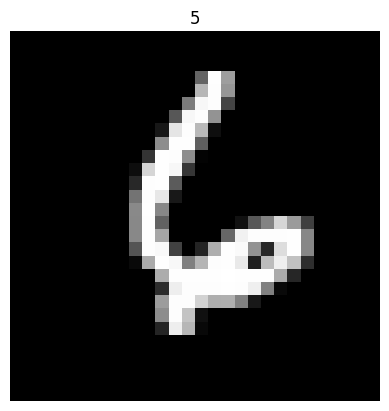

In [15]:
plt.imshow(train_data.data[59000], cmap='gray')#train_data.data[5] contendrá el dato en la posición 5 del conjunto
plt.title('%i' % train_data.targets[0])#de datos de entrenamiento,la raiz data
plt.axis("off")
plt.show()

In [16]:
train_data[100]#como se aprecia se tiene la matriz de la imagen y su etiqueta 5 en este caso

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 5)

Mostramos las 25 primeras imagenes aleatoriamente del conjunto de entrenamiento

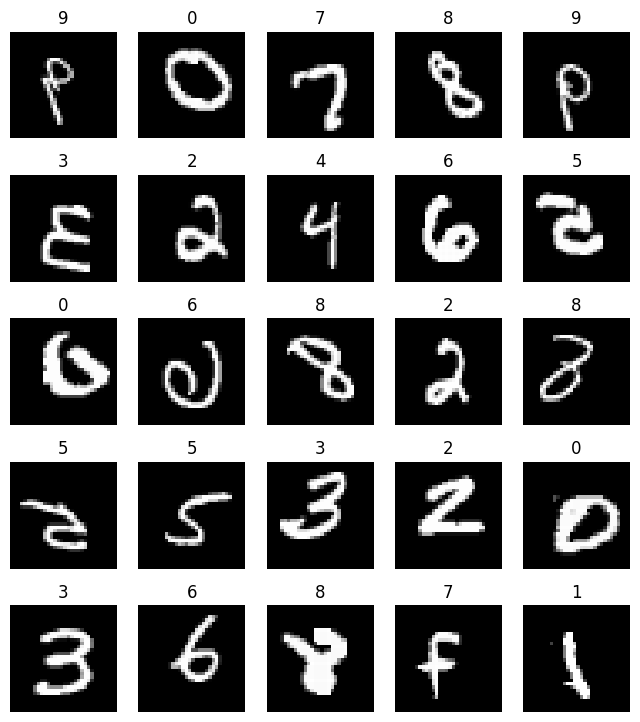

In [17]:
figure = plt.figure(figsize=(8, 9))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):#Iterar del 1 al 25
    sample_idx = torch.randint(len(train_data), size=(1,)).item()# Selecciona un índice aleatorio del conjunto de datos
    #osea sample_idx solo sera un numero comprendido de 0 60000
    img, label = train_data[sample_idx]# obtiene la matriz de la imagen y su etiqueta
    figure.add_subplot(rows, cols, i)#agrega la primera imagen aleatoria en la posicion i
    plt.title(label)#imprime la etiqueta de la imagen como titulo
    plt.axis("off")# oculta los ejes de la subfigura
    #print(img.shape)#cada imagen es de 1x32x32 un solo canal por ser blanco con negro
    plt.imshow(img.squeeze(), cmap="gray")#muestra la imagen en la subfigura actual.
plt.show()#muestra la figura completa con todas las subfiguras

#img.squeeze() se utiliza para eliminar dimensiones de tamaño 1 del tensor. Esto es útil cuando tienes una imagen en escala de
#grises que está representada como un tensor 2D con una dimensión adicional para el canal de color (lo cual es común en PyTorch).
#cmap=gray Esto asegura que los píxeles más oscuros se representen como negro y los más claros como blanco

# Modelo LeNet-5
LeNet-5 es uno de los primeros modelos de redes neuronales convolucionales (CNNs) y fue desarrollado por científicos---entre ellos Yann LeCun---en 1998. Este modelo se diseñó principalmente para reconocer dígitos escritos a mano y fue utilizado para la lectura automatizada de cheques y documentos. LeNet-5 sentó las bases para el desarrollo de CNNs más avanzadas y modernas, influyendo significativamente en el campo del reconocimiento de patrones y el aprendizaje profundo.

### 1. Arquitectura del Modelo LeNet-5

LeNet-5 tiene una arquitectura sencilla y bien estructurada, que consta de 7 capas (excluyendo las capas de entrada y salida). Estas capas incluyen tres capas convolucionales, dos capas de subsampling (o pooling), y dos capas completamente conectadas.

### 1.1. Capa de Entrada:

* Dimensión: 32x32 píxeles (imagen en escala de grises).
* Nota: Las imágenes de MNIST originalmente son de 28x28 píxeles, por lo que se * agregan bordes para aumentar a 32x32 píxeles.

### 1.2. Capa Convolucional **conv1**:

* Filtros: 6 filtros de 5x5.
* Salida: 6 mapas de características de 28x28 (32 - 5 + 1 = 28).
          28x28x6
          tiene padding=0 y strike=1

### 1.3. Capa de Subsampling **s1**:

* Operación: Subsampling o pooling (promedio) con una ventana de 2x2.
* Salida: 6 mapas de características de 14x14.
          14x14x6
          Entonces se reduce de 28x28 a 14x14, se mantiene la
          profundidad de 6

### 1.4. Capa Convolucional **conv2**:

* Filtros: 16 filtros de 5x5, tendrá 16 de profundidad
* Salida: 16 mapas de características de 10x10 (14 - 5 + 1 = 10).
          10x10x16
          padding=0 y strike=1

### 1.5. Capa de Subsampling **s2**:

* Operación: Subsampling (promedio) con una ventana de 2x2.
* Salida: 16 mapas de características de 5x5.
          5x5x16

### 1.6. Capa Convolucional **conv3**:

Filtros: 120 filtros de 5x5, por tanto 120 de produnfidad o mapas
Salida: 120 mapas de características de 1x1 (5 - 5 + 1 = 1).
       1x1x120

### 1.7. Capa Completamente Conectada **f1**:

* Neuronas: 84.
* Operación: Función de activación sigmoid o tanh.

### 1.8 Capa Completamente Conectada **f2** (salida):

* Neuronal: 10 (una por cada dígito del 0 al 9).
* Operación: Función de activación **softmax** para clasificación.

### 1.2. Flujo de Datos en la Red
* Entrada: Imagen de 32x32 píxeles.
* **conv1**: Convolución → 28x28x6.
* **s2**: Subsampling → 14x14x6.      6 filtros
* **conv2**: Convolución → 10x10x16.  16 filtros
* **s2**: Subsampling → 5x5x16.       16 filtros
* **conv3**: Convolución → 1x1x120.   
* **f1**: Conexión completa → 84.
* **f2**: Conexión completa → 10 (clases).

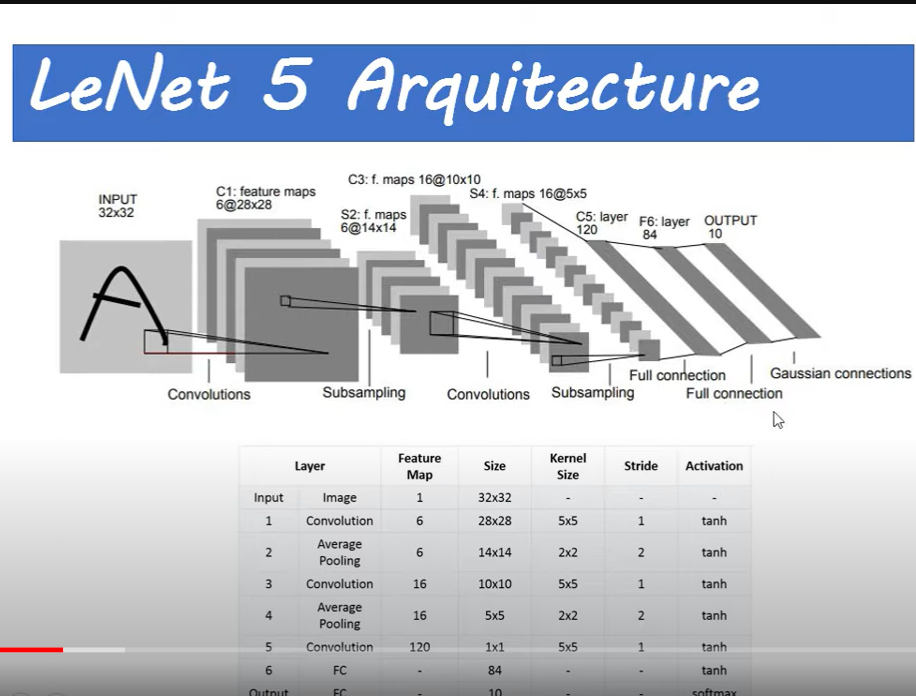

In [146]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        # conv1: entrada 1 canal, salida 6 canales(06 filtros), tamaño de kernel o filtro 5x5
        self.conv1 = nn.Conv2d(1, 6, 5)

        # conv2: entrada 6 canales, salida 16 canales, tamaño de kernel 5x5
        self.conv2 = nn.Conv2d(6, 16, 5)
        return x

        # conv3: entrada 16*4*4, salida 120
        self.conv3 = nn.Conv2d(16, 120, 5)

        # f2: entrada 120, salida 84
        self.fc1 = nn.Linear(120, 84)

        # Capa completamente conectada 3: entrada 84, salida 10 (dígitos)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        # Aplicar la primera capa convolucional seguida de ReLU y max pooling
        x = F.relu(self.conv1(x))
        x = F.avg_pool2d(x, 2)

        # Aplicar la segunda capa convolucional seguida de ReLU y max pooling
        x = F.relu(self.conv2(x))
        x = F.avg_pool2d(x, 2)

        # Aplicar la tercera capa convolucional seguida de ReLU
        x = F.relu(self.conv3(x))

        # Aplanar los datos para la capa completamente conectada
        x = x.view(-1, 120)

        # Aplicar la primera capa completamente conectada seguida de ReLU
        x = F.relu(self.fc1(x))

        # Aplicar la segunda capa completamente conectada
        x = self.fc2(x)

        # No es necesario aplicar el softmax si se utiliza el "CrossEntropyLoss"
        #x = F.softmax(x, dim=1)
        return x

Luego, debemos instanciar el modelo

In [28]:
model = LeNet()

print(model)

TypeError: __init__() should return None, not 'Tensor'

Podemos probar para un salida cualquier que tipo de salida obtenemos.

In [31]:
x = torch.rand(32,1,32,32)

# 'x' es un 'batch' de cuatro imagenes de 28x28x1
y = model(x)

print(y.shape)

torch.Size([32, 10])


## La dimension de los 'kernels' de nuestro modelo

Capas convolucionales

In [32]:
print(f"conv1 shape (W): {model.conv1.weight.size()}")
print(f"conv1 shape (b): {model.conv1.bias.size()}")

print(f"conv2 shape (W): {model.conv2.weight.size()}")
print(f"conv2 shape (b): {model.conv2.bias.size()}")

print(f"conv3 shape (W): {model.conv3.weight.size()}")
print(f"conv3 shape (b): {model.conv3.bias.size()}")

conv1 shape (W): torch.Size([6, 1, 5, 5])
conv1 shape (b): torch.Size([6])
conv2 shape (W): torch.Size([16, 6, 5, 5])
conv2 shape (b): torch.Size([16])
conv3 shape (W): torch.Size([120, 16, 5, 5])
conv3 shape (b): torch.Size([120])


Capas 'Full Connected'

In [25]:
print(f"fc shape (W): {model.fc1.weight.size()}")
print(f"fc1 shape (b): {model.fc1.bias.size()}")

print(f"fc2 shape (W): {model.fc2.weight.size()}")
print(f"fc2 shape (b): {model.fc2.bias.size()}")

fc shape (W): torch.Size([84, 120])
fc1 shape (b): torch.Size([84])
fc2 shape (W): torch.Size([10, 84])
fc2 shape (b): torch.Size([10])


## Función de Activación **Softmax**

La función softmax es una función de activación que convierte un vector de valores arbitrarios en un vector de probabilidades, donde la suma de todas las probabilidades es igual a 1. Es especialmente útil en problemas de clasificación donde se necesita asignar probabilidades a diferentes clases (múltiples clases).

Matemáticamente, la función softmax para una entrada $\mathbf{z}=[z_1,z_2,\cdots,z_N]$:

$$y_i=\texttt{softmax}(z_i)=\frac{e^{z_i}}{\sum_{k=1}^N e^{z_k}}$$

donde $e$ es la base de logaritmo natural.

**Aplicación de Softmax en Tareas de Clasificación:**

* **Transformación a Probabilidades**: Esto es crucial para interpretar las salidas del modelo como probabilidades de pertenencia a cada clase.

* **Facilita la Comparación entre Clases**: La clase con la probabilidad más alta después de aplicar softmax es la predicción del modelo.

* **Compatibilidad con la Función de Pérdida**: La función de **Costo de Entropía Cruzada (Cross-Entropy)**, comúnmente utilizada en tareas de clasificación, requiere que las salidas del modelo sean probabilidades. Softmax garantiza que las salidas del modelo sean compatibles con esta función de pérdida.

# Función de Costo

La función de costo o pérdida de entropía cruzada (Cross-Entropy Loss) es ampliamente utilizada en tareas de clasificación. Esta función mide la diferencia entre las distribuciones de probabilidad predichas por el modelo y las verdaderas etiquetas de clase.

## Definición Matemática

Para un solo ejemplo de entrada con $N$ clases, la entropía cruzada se define como:

 $$CE=-\frac{1}{\mathcal{B}}\sum_{i}^{\mathcal{B}}t_i\log(y_i)$$

donde $\mathcal{B}$ es el tamaño del batch, es decir la cantidad de imagenes que se está utilizando en cada iteración. Además:

* $t_i$ es el valor verdadero de la $i$-ésima clase (0 o 1, en **one-hot encoding**).
* $y_i$ es la probabilidad predicha por el modelo para la $i$-ésima clase.

In [33]:
loss_function = nn.CrossEntropyLoss()

# ¿Que es un optimizador?

Un optimizador es un algoritmo que ajusta iterativamente los parámetros (pesos y biases) de un modelo de red neuronal para minimizar la función de pérdida durante el entrenamiento. El objetivo principal del optimizador es encontrar los valores de los parámetros que hacen que el modelo realice una predicción de los resultados más cercana a los valores reales en los datos de entrenamiento.

**¿Cómo Funciona un Optimizador?**

* **Inicialización de Parámetros**: Los parámetros del modelo se inicializan con valores aleatorios.

* **Cálculo de la Pérdida**: La función de pérdida se calcula para medir cuán lejos están las predicciones del modelo de las etiquetas reales.

* **Cálculo del Gradiente**: Se utiliza el algoritmo de *Backpropagation* para calcular los gradientes de la función de pérdida con respecto a cada parámetro del modelo.

* **Actualización de Parámetros**: Los parámetros del modelo se **actualizan en la dirección opuesta a la del gradiente para reducir la pérdida**. La magnitud de cada actualización está controlada por la **tasa de aprendizaje** o *Learning Rate*.

Este ciclo se repite durante múltiples épocas hasta que la función de pérdida se minimiza o se alcanza un criterio de parada.

# El optimizador Adam

1. $m_t\leftarrow \beta_1\cdot m_{t-1}+(1-\beta_1)\cdot g_t$
2. $v_t\leftarrow \beta_2\cdot v_{t-1}+(1-\beta_2)\cdot g^2_t$
3. $\hat{m}_t\leftarrow \frac{m_t}{1-\beta^t_1}$
4. $\hat{v}_t\leftarrow \frac{v_t}{1-\beta^t_2}$
5. $\theta_t\leftarrow \theta_{t-1}-\alpha\cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t}+\epsilon}$

donde:

* $\theta_t$: El parámetro del modelo en la iteración $t$.
* $\alpha$: La tasa de aprendizaje
* $\epsilon$: Es un pequeño valor constante para evitar la división por cero (típicamente $10^{-8}$).
* $m_t$: El momento de primer orden.
* $v_t$: El momento de segundo orden.
* $g_t$: La gradiente en la iteración $t$.


## Beneficios del Optimizador Adam

* **Rápida Convergencia**: Adam tiende a converger más rápidamente que otros optimizadores, lo cual es particularmente útil en redes neuronales profundas y grandes conjuntos de datos.

* **Robustez**: Adam es robusto frente a hiperparámetros mal ajustados, lo que lo hace más fácil de usar en comparación con otros optimizadores que requieren una cuidadosa sintonización de hiperparámetros.

* **Estabilidad**: La combinación de momentos de primer y segundo orden proporciona una actualización más estable, lo que ayuda a evitar oscilaciones en el proceso de entrenamiento.

* **Eficiencia Computacional**: Aunque Adam realiza cálculos adicionales en comparación con **SGD**, sigue siendo computacionalmente eficiente .

In [34]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Entrenamiento

El entrenamiento nos permite ajustar los parámetros del modelo para minimizar la función de pérdida en los datos de entrenamiento.

Durante el entrenamiento, el modelo aprende a mapear las entradas a las salidas correctas a través de un proceso iterativo. Se utiliza el conjunto de datos de entrenamiento para calcular el la función de pérdida, los gradientes y luego actualizar los parámetros del modelo.

In [36]:
def train(model, train_data, valid_data, optimizer, num_epochs):
  train_loader, valid_loader = split_train_valid_data(train_data, valid_data)

  model.train()#modelo en modo de entrenamiento

  train_steps = len(train_loader) # nro. de batch

  for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      output = model(images)
      loss   = loss_function(output, labels)

      # Limpiar gradientes
      optimizer.zero_grad()

      # Backpropagation: Calculo de la gradientes
      loss.backward()

      # Actualizando de los parametros
      optimizer.step()

      if (i+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], it: [{i+1:0>4}/{train_steps}], loss: {loss.item():.4f}")

    # Validacion
    model.eval() #no calculo gradientes
    valid_steps = len(valid_loader) # nro. de batch
    valid_loss = []
    for i, (images, labels) in enumerate(valid_loader):
      output = model(images)
      loss   = loss_function(output, labels)
      valid_loss.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], valid_loss: {np.mean(valid_loss):.4f}")


# Evaluación del modelo

La evualición es un paso fundamental para medir el rendimiento del modelo en datos no vistos durante el entrenamiento y ajustar hiperparámetros.

El conjunto de validación se utiliza para seleccionar el mejor modelo y ajustar hiperparámetros como la tasa de aprendizaje, la regularización, y la arquitectura del modelo. **No se utiliza para entrenar el modelo**; en cambio, se evalúa periódicamente durante el entrenamiento para verificar si el modelo está mejorando y para prevenir el sobreajuste.


In [38]:
num_epochs=3

train(model, train_data, valid_data, optimizer, num_epochs)

Epoch [1/3], it: [0100/1688], loss: 0.8243
Epoch [1/3], it: [0200/1688], loss: 0.9238
Epoch [1/3], it: [0300/1688], loss: 0.8580
Epoch [1/3], it: [0400/1688], loss: 0.8561
Epoch [1/3], it: [0500/1688], loss: 0.6995
Epoch [1/3], it: [0600/1688], loss: 0.7053
Epoch [1/3], it: [0700/1688], loss: 1.3281
Epoch [1/3], it: [0800/1688], loss: 0.7042
Epoch [1/3], it: [0900/1688], loss: 1.0490
Epoch [1/3], it: [1000/1688], loss: 0.6268
Epoch [1/3], it: [1100/1688], loss: 0.6207
Epoch [1/3], it: [1200/1688], loss: 0.6000
Epoch [1/3], it: [1300/1688], loss: 0.6194
Epoch [1/3], it: [1400/1688], loss: 1.1625
Epoch [1/3], it: [1500/1688], loss: 0.5712
Epoch [1/3], it: [1600/1688], loss: 0.4998
Epoch [1/3], valid_loss: 0.6429
Epoch [2/3], it: [0100/1688], loss: 0.4916
Epoch [2/3], it: [0200/1688], loss: 0.6555
Epoch [2/3], it: [0300/1688], loss: 0.5529
Epoch [2/3], it: [0400/1688], loss: 0.7117
Epoch [2/3], it: [0500/1688], loss: 0.6771
Epoch [2/3], it: [0600/1688], loss: 0.6249
Epoch [2/3], it: [0700

Validacion con los datos del Test

In [39]:
def get_accuracty(outputs, labels):
 #output la salida del modelo
 #label la etiqueta con la imagen de entrada (valor real)

  preds  = np.argmax(outputs.detach().numpy(), axis=1)
  labels = labels.numpy()

  acc = (preds == labels)

  return np.mean(acc)

def evaluacion_test_data(model, test_loader):
  model.eval()

  loss_it = []
  acc_it  = []

  total_steps = len(test_loader)

  for i, (images, labels) in enumerate(test_loader):
    outputs = model(images)

    loss = loss_function(outputs, labels)
    acc  = get_accuracty(outputs, labels)

    loss_it.append(loss.item())
    acc_it.append(acc.item())

  print('Loss={:.4f}, Accuracy={:.4f}'.format(np.mean(loss_it), np.mean(acc_it)))

In [40]:
evaluacion_test_data(model, test_loader)

Loss=0.4745, Accuracy=0.8498


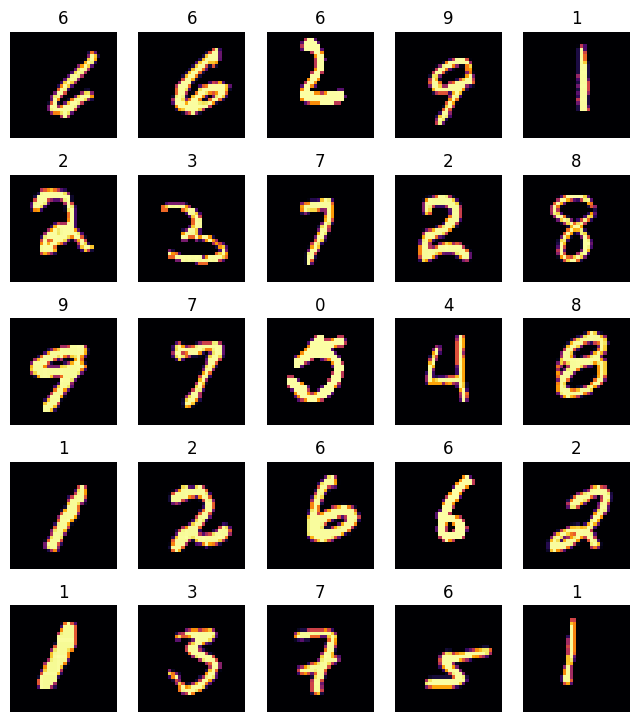

In [41]:
figure = plt.figure(figsize=(8, 9))
cols, rows = 5, 5

model.eval()

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    image, label = test_data[sample_idx]

    output = model(image.unsqueeze(0))

    pred = np.argmax(output.detach().numpy(), axis=1)[0]
    figure.add_subplot(rows, cols, i)
    plt.title(pred)
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="inferno")
plt.show()

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
import numpy as np

In [7]:
size=(20,30)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

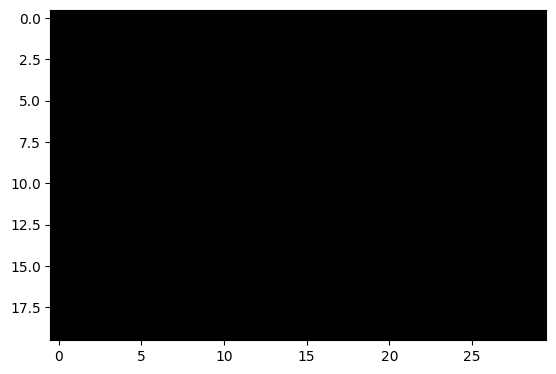

In [13]:
imagen_negra = np.zeros(size)
plt.imshow(imagen_negra,vmin=0,vmax=1)
print(imagen_negra)

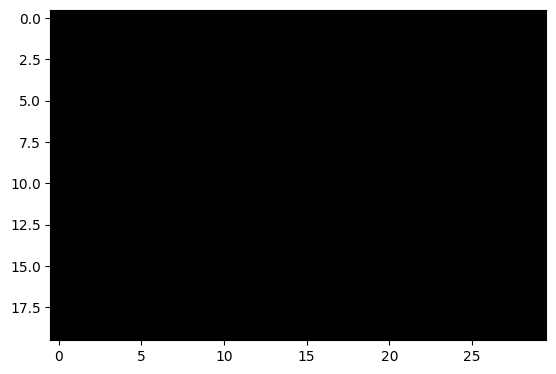

In [14]:
imagen_blanca = np.ones(size)
plt.imshow(imagen_negra,vmin=0,vmax=1)

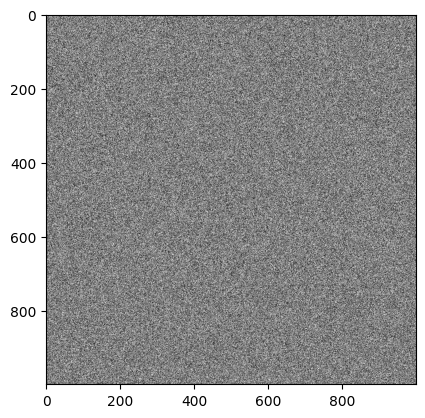

In [17]:
matriz_aleatoria = np.random.rand(1000, 1000)
plt.imshow(matriz_aleatoria,vmin=0,vmax=1)

In [22]:
#colores
from skimage import io

In [26]:
lena_rgb=io.imread("lena.png")/255.0

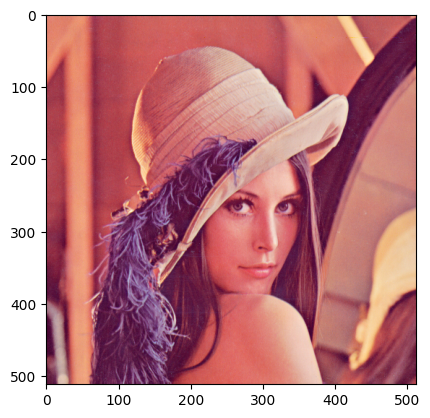

In [28]:
plt.imshow(lena_rgb)

En este caso, tenemos tres dimensiones. Las primeras dos, de tamaño  512
 , corresponden a la cantidad de pixeles de la imagen. La última, de tamaño 3, contiene los tres canales R, G y B de la imagen.

<Figure size 640x480 with 0 Axes>

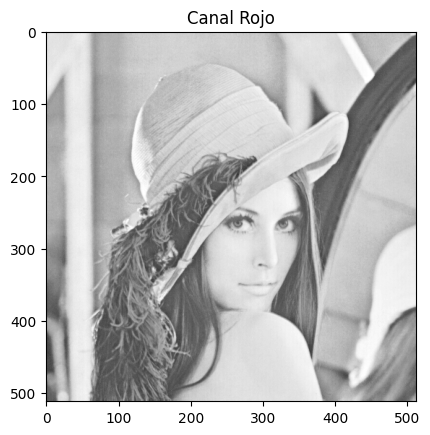

<Figure size 640x480 with 0 Axes>

In [29]:
plt.imshow(lena_rgb[:,:,0],vmin=0,vmax=1)
plt.title("Canal Rojo")
plt.figure()

Text(0.5, 1.0, 'Canal Verde')

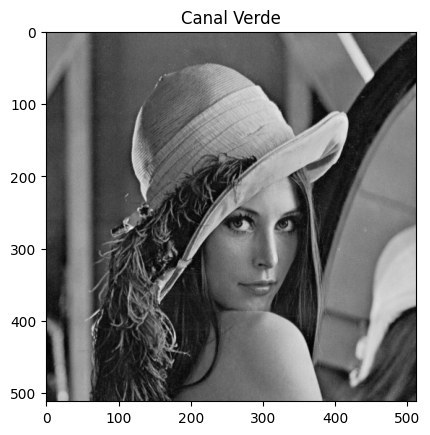

In [32]:
plt.imshow(lena_rgb[:,:,1],vmin=0,vmax=1)
plt.title("Canal Verde")

Text(0.5, 1.0, 'Canal Azul')

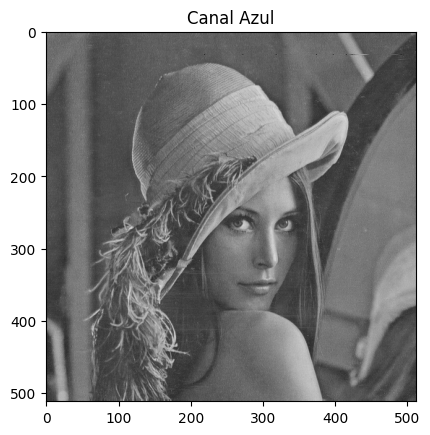

In [31]:
plt.imshow(lena_rgb[:,:,2],vmin=0,vmax=1)
plt.title("Canal Azul")

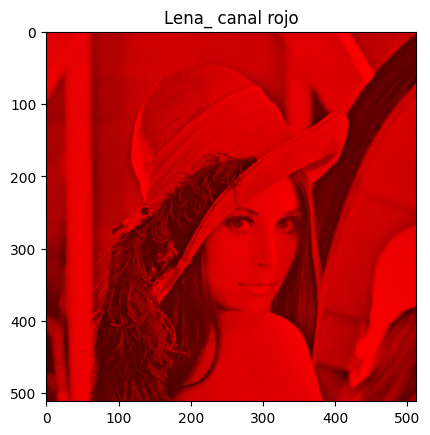

In [56]:
lena_red=np.copy(lena_rgb) # creo una copia de la imagen para preservar la original
lena_red[:,:,1]=0
lena_red[:,:,2]=0
plt.title("Lena_ canal rojo")
plt.imshow(lena_red)

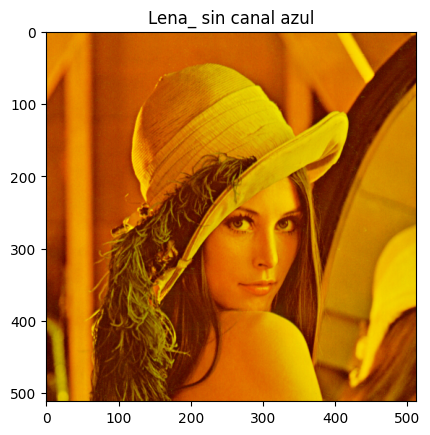

In [57]:
lena_red_green=np.copy(lena_rgb) # creo una copia de la imagen para preservar la original
lena_red_green[:,:,2]=0
plt.title("Lena_ sin canal azul")
plt.imshow(lena_red_green)

Conversión de color a escala de grises

La conversión de una imagen de color a escala de grises se puede hacer de varias formas.
El pixel  (1,1,1)
  representa el blanco y el  (0,0,0)
  el negro en RGB. Entonces, cuanto más grandes son los valores de los canales, más "blanco" es el pixel y viceversa.
  Por eso, una forma simple para hacer la conversión consiste en sacar el promedio de los canales y usar eso como la intensidad.

Entonces cada trio  (r,g,b)
  que representa un pixel se reemplaza por su promedio  (r+g+b)3
 .

In [58]:
h,w,c=lena_rgb.shape

En este caso, tenemos tres dimensiones. Las primeras dos, de tamaño  512
 , corresponden a la cantidad de pixeles de la imagen. La última, de tamaño 3, contiene los tres canales R, G y B de la imagen.

In [59]:
lena_rgb.shape#tamaño de 512 por 512 y

(512, 512, 3)

In [63]:
lena_gris=np.zeros((h,w))

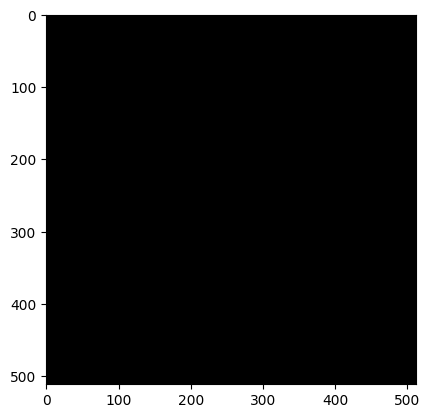

In [64]:
for i in range(h):
    for j in range(w):
        pass
        #IMPLEMENTAR
        # calcular el promedio de los canales r,g,b del pixel i,j con la imagen original
        # guardar ese promedio en el pixel i,j de la imagen generada

plt.imshow(lena_gris)

In [65]:
io.imsave("lena_generada.png",lena_gris)

<ipython-input-65-c24c939b7163>:1: UserWarning: lena_generada.png is a low contrast image
  io.imsave("lena_generada.png",lena_gris)


OSError: cannot write mode F as PNG